# Importing Header, SoilPrep, and PlotFunctions

In [2]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [3]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


C:\Users\abhis\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [ ]:
import import_ipynb
from HyperMainSentinelNew import *

importing Jupyter notebook from HyperMainSentinelNew.ipynb
tree for: mult ------> running on: Sand
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Sand----> SpecProc: none ---> n_band: 10
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Sand----> SpecProc: fod2 ---> n_band: 10
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Sand----> SpecProc: cr ---> n_band: 10
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Sand----> SpecProc: log ---> n_band: 10
End time - Start time = 10.332248449325562
tree for: mult ------> running on: Silt
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Silt----> SpecProc: none ---> n_band: 10
Fitting 86 folds for each of 2 candidates, totalling 172 fits
Method: mult---> Target: Silt----> SpecProc: fod2 ---> n_band: 10
Fitting 86 folds for each of 2 candidates, totalling 

Method: svr---> Target: TOC----> SpecProc: cr ---> n_band: 10
Fitting 86 folds for each of 18 candidates, totalling 1548 fits
Method: svr---> Target: TOC----> SpecProc: log ---> n_band: 10
End time - Start time = 25.986401319503784
tree for: svr ------> running on: CaCO3
Fitting 86 folds for each of 18 candidates, totalling 1548 fits
Method: svr---> Target: CaCO3----> SpecProc: none ---> n_band: 10
Fitting 86 folds for each of 18 candidates, totalling 1548 fits
Method: svr---> Target: CaCO3----> SpecProc: fod2 ---> n_band: 10
Fitting 86 folds for each of 18 candidates, totalling 1548 fits
Method: svr---> Target: CaCO3----> SpecProc: cr ---> n_band: 10
Fitting 86 folds for each of 18 candidates, totalling 1548 fits
Method: svr---> Target: CaCO3----> SpecProc: log ---> n_band: 10
End time - Start time = 24.77645468711853
End time - Start time = 126.01825046539307
tree for: ridge ------> running on: Sand
Fitting 86 folds for each of 14 candidates, totalling 1204 fits
Method: ridge---> Tar

## Loading  Mtree 

In [10]:
with open ('HMtreeSenNew.pickle', 'rb') as file:
    HMtreeSenNew = pickle.load(file)

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [11]:
feature_scores = {}

model_details ={}

In [23]:
HMtreeSenNew['plsr']['Silt']['none']['fod2']

{'bp': {'n_components': 4},
 'X_test':          493       560       665       704       741       783       833  \
 76  0.092232  0.103406  0.028157  0.023571  0.019460  0.012313  0.006098   
 0   0.049058  0.096656  0.028886  0.025786  0.020817  0.013582  0.007529   
 71  0.086641  0.100433  0.028638  0.024143  0.020397  0.013197  0.006692   
 23  0.029648  0.050024  0.016800  0.015429  0.014238  0.012487  0.007146   
 12  0.067791  0.094045  0.026367  0.023286  0.020159  0.015354  0.008502   
 57  0.150195  0.130608  0.035249  0.026286  0.016875  0.004678  0.000769   
 10  0.139684  0.132174  0.034654  0.028637  0.023852  0.013907  0.006707   
 19  0.047998  0.065271  0.026044  0.022986  0.022804  0.022374  0.013425   
 4   0.051135  0.071463  0.015638  0.013071  0.006246 -0.002937 -0.002652   
 68  0.147134  0.137698  0.031841  0.024224  0.014960  0.002803 -0.000143   
 62  0.033641  0.051815  0.022151  0.021350  0.023705  0.026805  0.016804   
 65  0.036477  0.045267  0.018225  0.0

##  Sand Models

### Cubist

Sand -> [ r2 - **0.52**, Spec - fod2, n_bands -10]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.

In [13]:
sand_model_cubist = Cubist(n_committees = 15, n_rules = 10) 
sand_model_cubist.fit(fod_sampled10,  T[0])

Cubist(n_committees=15, n_rules=10)

In [ ]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, fod_sampled10, T[0], n_repeats=20, random_state=0)

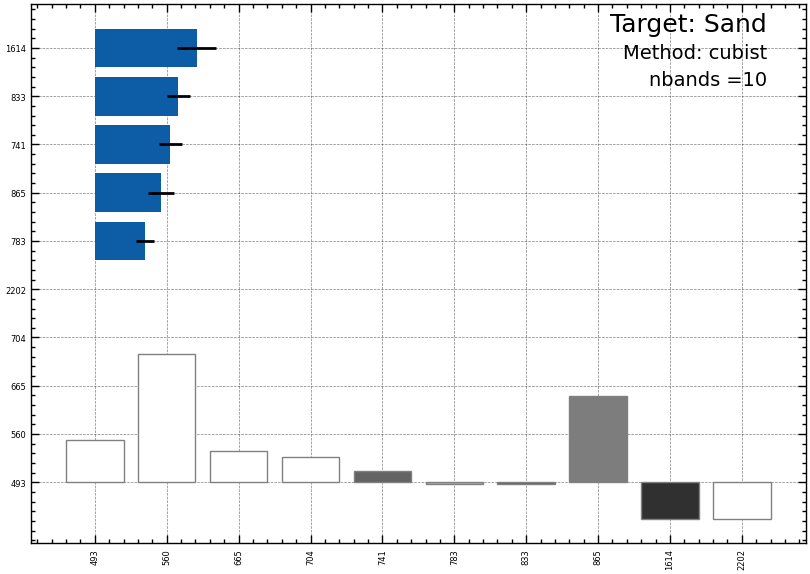

In [16]:
model_details['Sand'] = {'method': 'cubist', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Sand', model_details, feature_scores, 3, 20, 2)

Sand -> [ r2 - **0.5**, Spec - fod2, n_bands -10]     <br/><br/>
***Description***: To obtain the best model for sand using plsr method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.

In [18]:
sand_model_plsr = PLSRegression(n_components=4, scale=True) 
sand_model_plsr.fit(fod_sampled10,  T[0])

PLSRegression(n_components=4)

In [19]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, fod_sampled10, T[0], n_repeats=20, random_state=0)

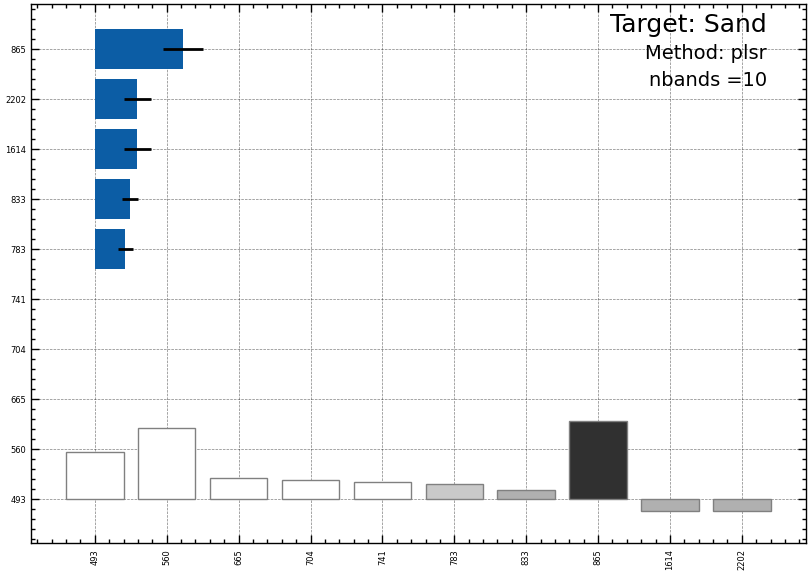

In [22]:
model_details['Sand'] = {'method': 'plsr', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Sand', model_details, feature_scores, 4, 20, 20)

##  Silt 

### PLSR

Silt -> [ r2 - **0.32**, Spec - fod2, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for silt using plsr method we trained the model on the
 first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.


In [24]:
silt_model_plsr = PLSRegression(n_components=4, scale=True)  
silt_model_plsr.fit(fod_sampled10,  T[1])

PLSRegression(n_components=4)

In [25]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, fod_sampled10, T[1], n_repeats=20, random_state=0)

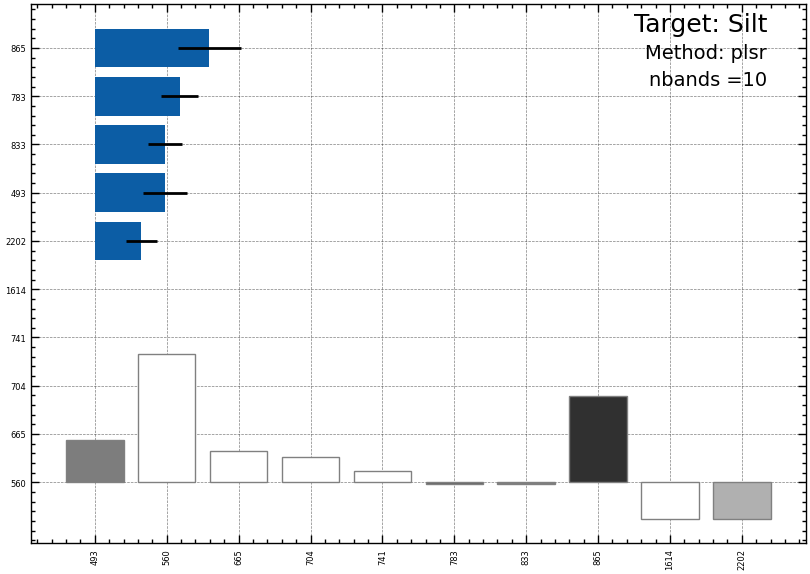

In [27]:
model_details['Silt'] = {'method': 'plsr', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Silt', model_details, feature_scores, 6, 20, 2)

{'bp': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50},
 'X_test':          493       560       665       704       741       783       833  \
 76  0.092232  0.103406  0.028157  0.023571  0.019460  0.012313  0.006098   
 0   0.049058  0.096656  0.028886  0.025786  0.020817  0.013582  0.007529   
 71  0.086641  0.100433  0.028638  0.024143  0.020397  0.013197  0.006692   
 23  0.029648  0.050024  0.016800  0.015429  0.014238  0.012487  0.007146   
 12  0.067791  0.094045  0.026367  0.023286  0.020159  0.015354  0.008502   
 57  0.150195  0.130608  0.035249  0.026286  0.016875  0.004678  0.000769   
 10  0.139684  0.132174  0.034654  0.028637  0.023852  0.013907  0.006707   
 19  0.047998  0.065271  0.026044  0.022986  0.022804  0.022374  0.013425   
 4   0.051135  0.071463  0.015638  0.013071  0.006246 -0.002937 -0.002652   
 68  0.147134  0.137698  0.031841  0.024224  0.014960  0.002803 -0.000143   
 62  0.033641  0.051815  0.022151  0.021350  0.023705  0.026805  0.016804   

### Gradient Boosting Regression Tree

Silt -> [ r2 - **0.41**, Spec - fod2, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.


In [29]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled10,  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [30]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled10, T[1], n_repeats=20, random_state=0)

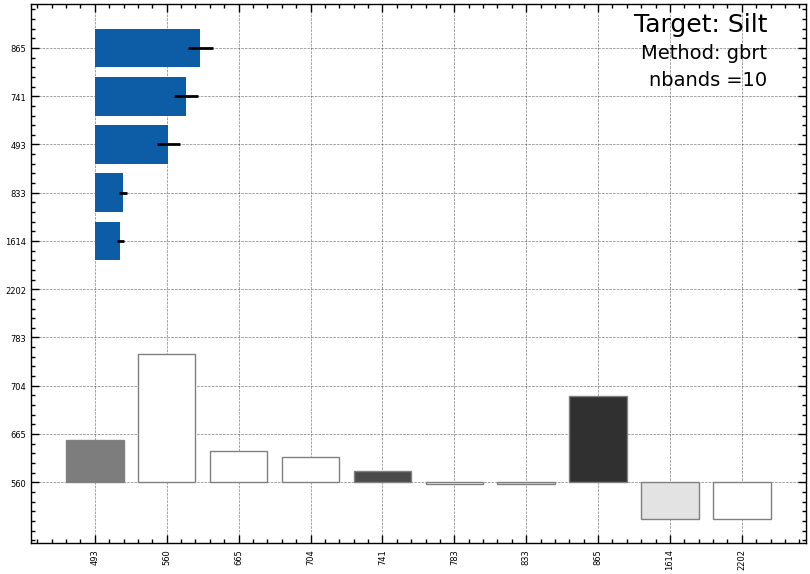

In [34]:
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Silt', model_details, feature_scores, 5, 20, 2)

## Clay 

In [1]:
HMtreeSenNew['plsr']['CaCO3']['none']['none']

NameError: name 'HMtreeSenNew' is not defined

### PLSR

Clay -> [ r2 - **0.61**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra and resampled it to the 10 bands provided by Sentinel.


In [36]:
clay_model_plsr = PLSRegression(n_components=4, scale=True)  
clay_model_plsr.fit(sampled_log10,  T[2])

PLSRegression(n_components=4)

In [37]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log10, T[2], n_repeats=20, random_state=0)

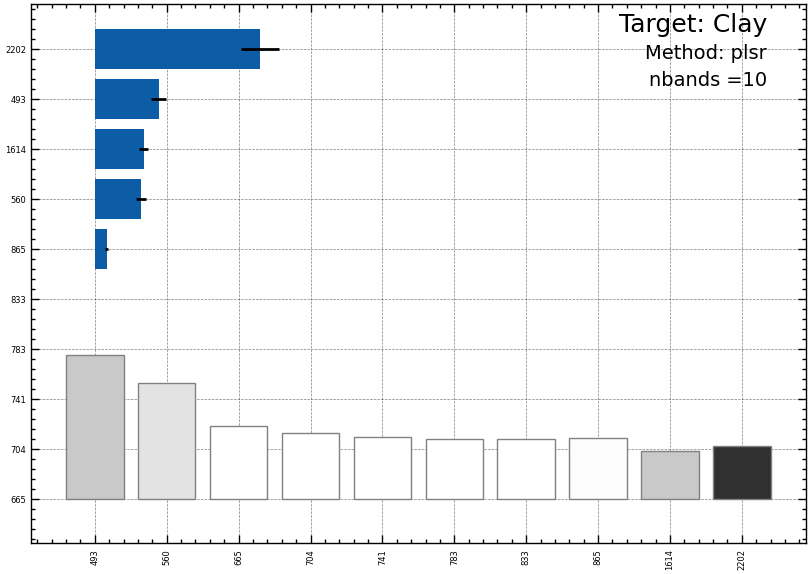

In [42]:
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('Clay', model_details, feature_scores, 0.2, 1, 2)

### Kernel Ridge

Clay -> [ r2 - **0.58**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra and resampled it to the 10 bands provided by Sentinel.


In [44]:
clay_model_kernelridge = KernelRidge(alpha = 0.001) 
clay_model_kernelridge.fit(sampled_log10,  T[2])

KernelRidge(alpha=0.001)

In [45]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log10, T[2], n_repeats=20, random_state=0)

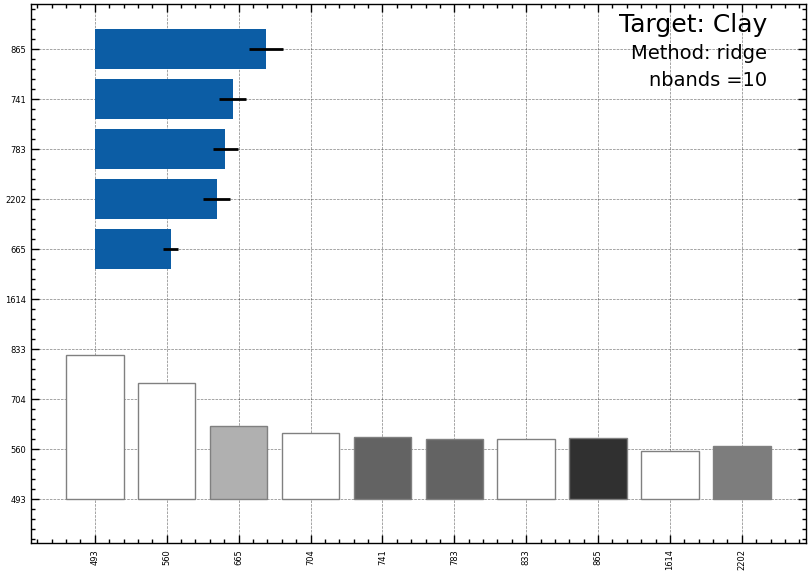

In [51]:
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('Clay', model_details, feature_scores, 0.05, 1, 2)

## TOC

### Cubist

TOC -> [ r2 - **0.41**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra and is resampled to the 10 bands provided by Sentinel.


In [53]:
TOC_model_cubist = Cubist(n_committees = 10, n_rules = 10)
TOC_model_cubist.fit(sampled_log10,  T[3])

Cubist(n_committees=10, n_rules=10)

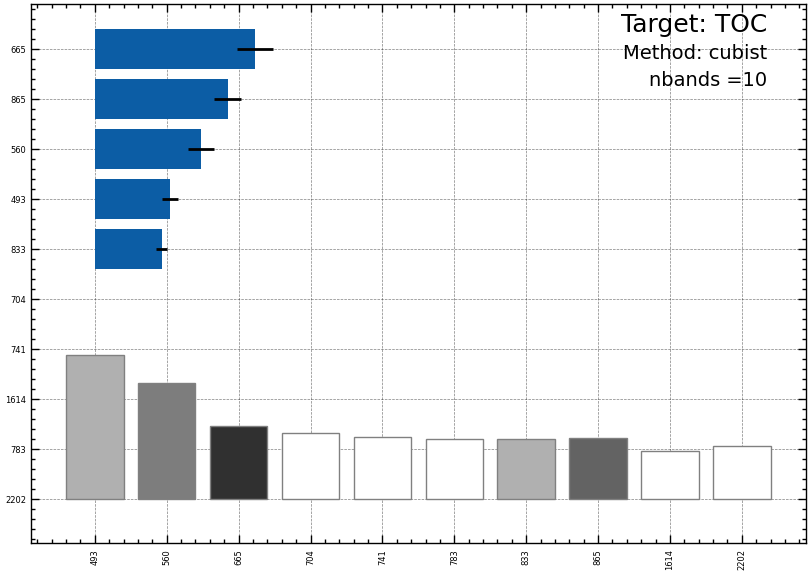

In [55]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, sampled_log10, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('TOC', model_details, feature_scores, 2, 1, 2)

### Gradient Boosting Regression Tree

TOC -> [ r2 - **0.49**, Spec - cr, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the continuum removal of the smoothed spectra and it is resampled to the 10 bands provided by Sentinel.


In [57]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(sampled_cr10,  T[3])

GradientBoostingRegressor(max_depth=4, n_estimators=30, random_state=42)

In [58]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_cr10, T[3], n_repeats=20, random_state=0)

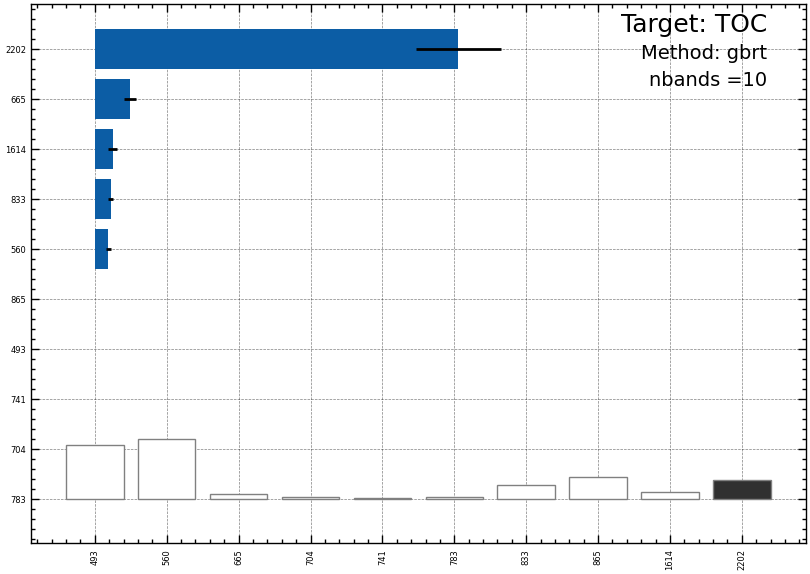

In [59]:
model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_cr10, 'spec_proc': 'cr', 'n_bands': 10}
show_important_features_for ('TOC', model_details, feature_scores, 4, 20, 2)

## CaCO3

### PLSR

CaCO3 -> [ r2 - **0.63**, Spec - none, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the smoothed spectra which is resampled to the 10 bands provided by Sentinel.


In [5]:
CaCO3_model_plsr = PLSRegression(n_components=4, scale=True)
CaCO3_model_plsr.fit(sampled_spec10,  T[4])

PLSRegression(n_components=4)

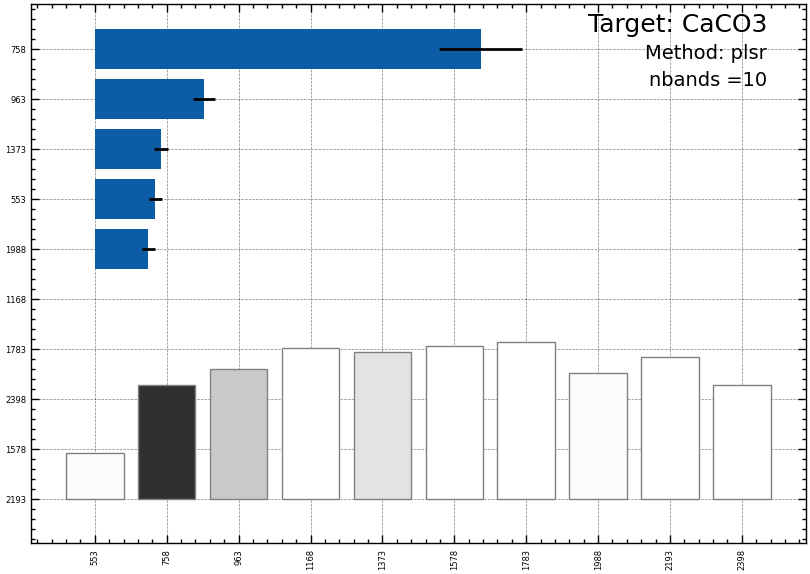

In [9]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_spec[10], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_spec[10], 'spec_proc': 'none', 'n_bands': 10}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.2, 8, 2)

### SVR

#### Train test

CaCO3 -> [ r2 - **0.62**, Spec - log, n_bands - 100]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 100 bands.


In [24]:
CaCO3_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
CaCO3_model_svr.fit(sampled_log[100],  T[4])

SVR(C=10, gamma=0.01, kernel='linear')

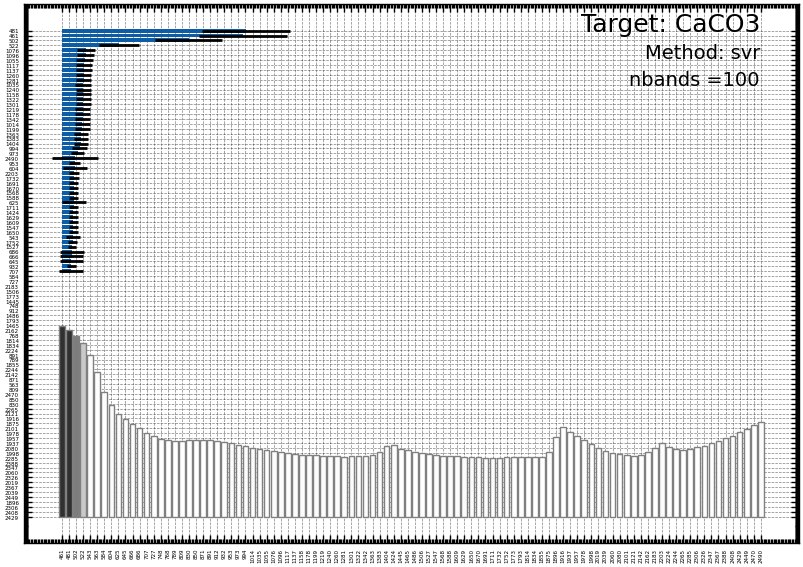

In [30]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_svr, sampled_log[100], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('CaCO3', model_details, feature_scores, 130, 13, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.58**, Spec - log, n_bands - 100]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 100 bands.


In [16]:
CaCO3_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
CaCO3_model_svr.fit(sampled_log[100],  T[4])

SVR(C=10, gamma=0.01, kernel='linear')

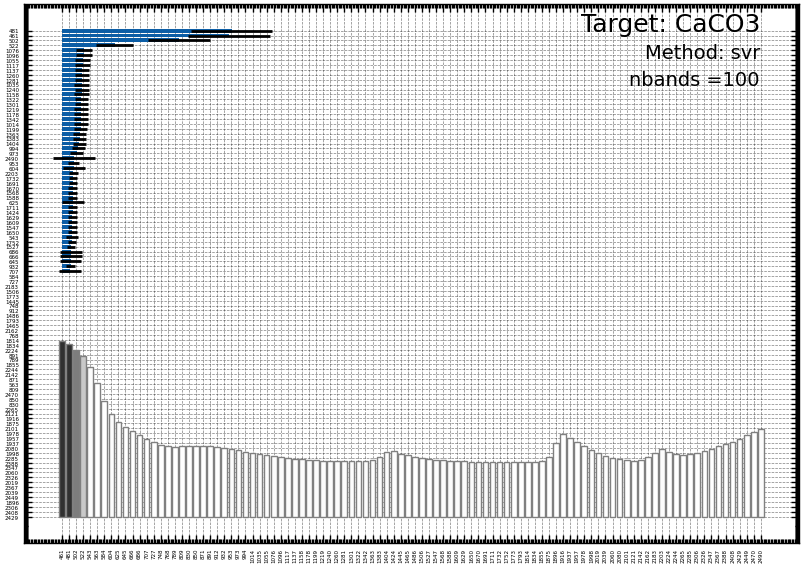

In [23]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_svr, sampled_log[100], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('CaCO3', model_details, feature_scores, 120, 12, 2)

### Kernel Ridge

#### Train test

CaCO3 -> [ r2 - **0.65**, Spec -none, n_bands - 9]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using kernel ridge regression method method we trained the model on the smoothed spectra which is resampled to 9 bands.


In [32]:
CaCO3_model_kernelridge = KernelRidge(alpha = 0.002) 
CaCO3_model_kernelridge.fit(sampled_spec[9],  T[4])

KernelRidge(alpha=0.002)

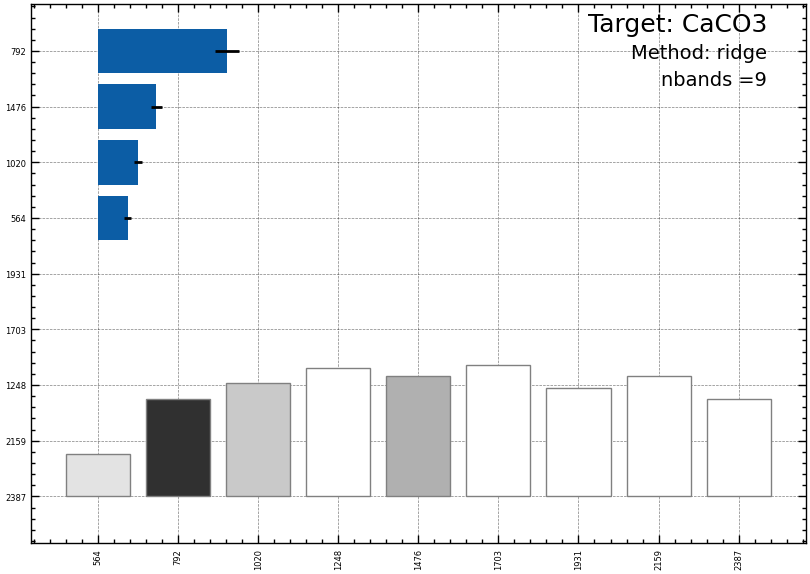

In [36]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_kernelridge, sampled_spec[9], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'ridge', 'spec': sampled_spec[9], 'spec_proc': 'none', 'n_bands': 9}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.06, 6, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.59**, Spec - log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 70 bands.


In [38]:
CaCO3_model_kernelridge = KernelRidge(alpha = 0.05) 
CaCO3_model_kernelridge.fit(sampled_log[70],  T[4])

KernelRidge(alpha=0.05)

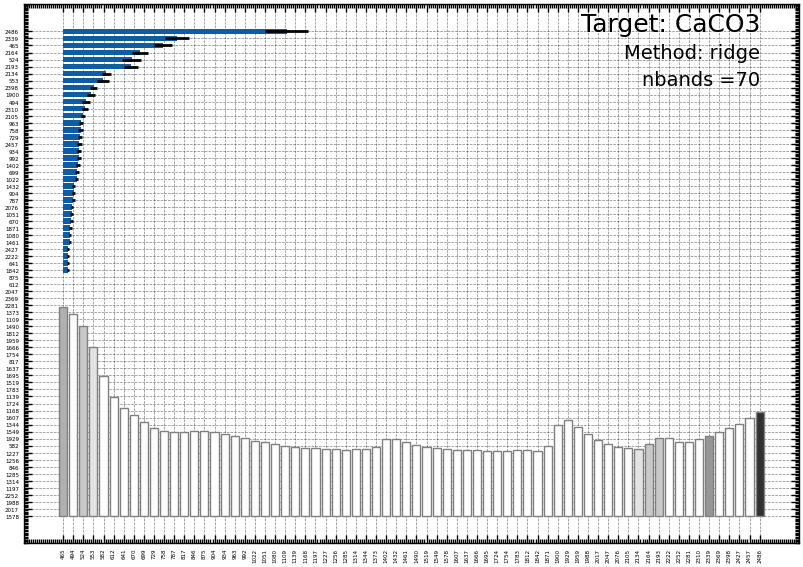

In [40]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_kernelridge, sampled_log[70], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'ridge', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('CaCO3', model_details, feature_scores, 3, 10, 2)

### Cubist

#### Train test

CaCO3 -> [ r2 - **0.69**, Spec - fod2, n_bands - 60]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 60 bands.


In [43]:
CaCO3_model_cubist = Cubist(n_committees = 5, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled[60],  T[4])

Cubist(n_committees=5, n_rules=10)

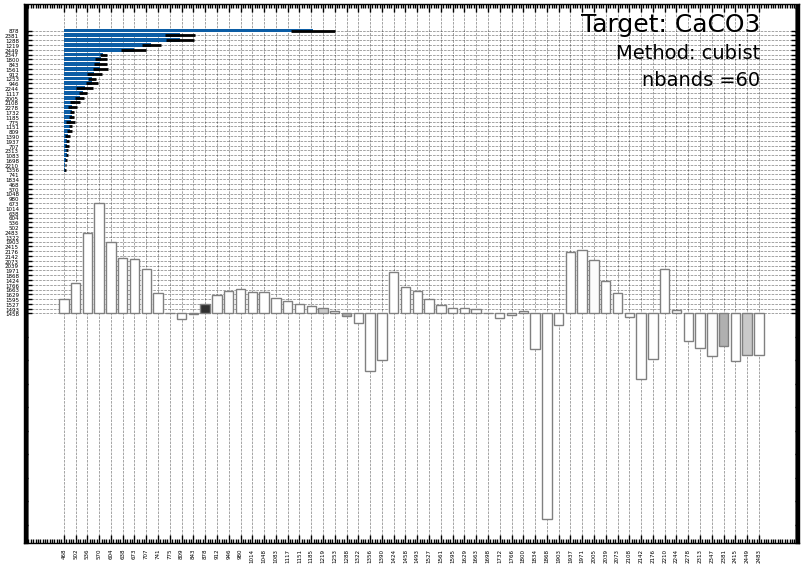

In [47]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[60], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[60], 'spec_proc': 'fod2', 'n_bands': 60}
show_important_features_for ('CaCO3', model_details, feature_scores, 30, 400, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [49]:
CaCO3_model_cubist =Cubist(n_committees = 10, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled[27],  T[4])

Cubist(n_committees=10, n_rules=10)

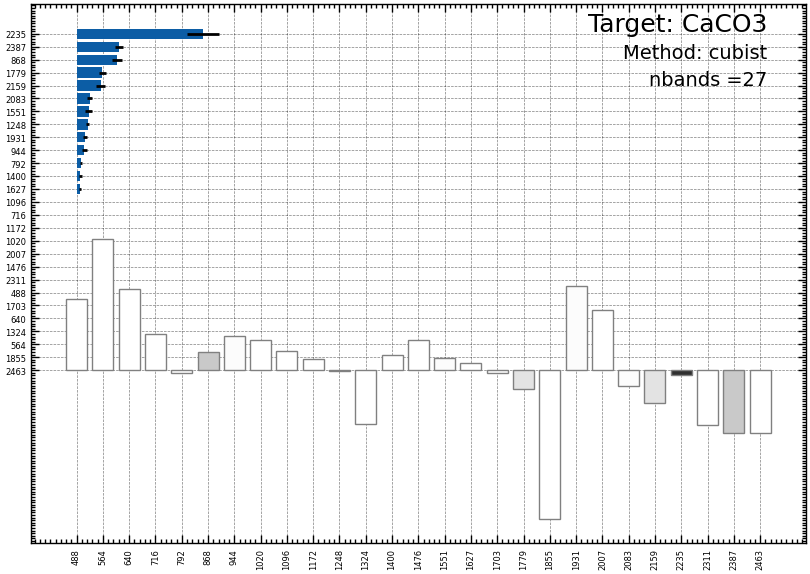

In [53]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)

### Gradient Boosting Regression Tree

#### Train test

CaCO3 -> [ r2 - **0.59**, Spec - fod2, n_bands - 35]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 35 bands.


In [61]:
CaCO3_model_gbrt =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
CaCO3_model_gbrt.fit(fod_sampled[35],  T[4])

GradientBoostingRegressor(n_estimators=50, random_state=42)

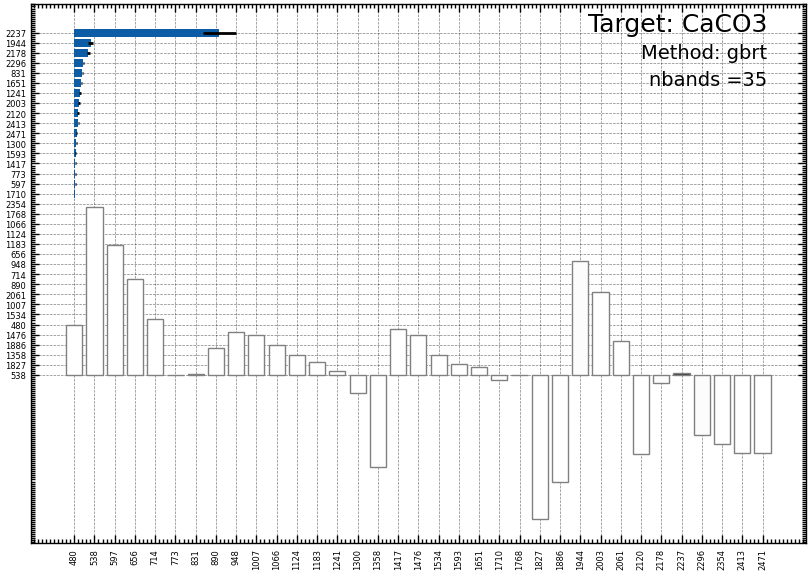

In [62]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, fod_sampled[35], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': fod_sampled[35], 'spec_proc': 'fod2', 'n_bands': 35}
show_important_features_for ('CaCO3', model_details, feature_scores, 10, 200, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [64]:
CaCO3_model_gbrt =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
CaCO3_model_gbrt.fit(fod_sampled[27],  T[4])

GradientBoostingRegressor(n_estimators=50, random_state=42)

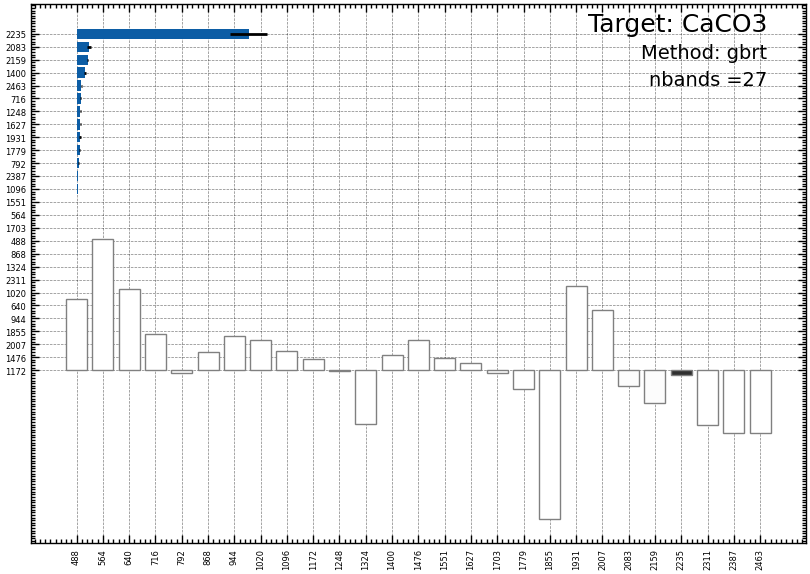

In [65]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)